In [164]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import sklearn.linear_model as skl
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [137]:
x = np.random.rand(100,1)
x = np.sort(x,axis=0)
y = 5*x*x+0.1*np.random.randn(100,1)

In [123]:
# Set up the design matrix X 
X = np.zeros((len(x),3))

X[:,0] = 1
X[:,1] = x.reshape(100)
X[:,2] = x.reshape(100)**2

#print(X)

In [124]:
beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
ytilde = X @ beta

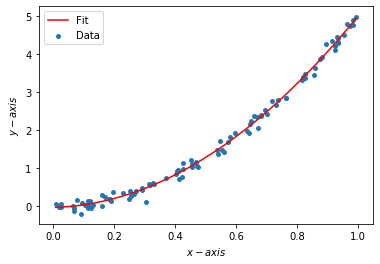

In [125]:
fig, ax = plt.subplots()
ax.set_xlabel(r'$x-axis$')
ax.set_ylabel(r'$y-axis$')
ax.scatter(x, y, label = 'Data', s = 15)
ax.plot(x, ytilde,'r-', label = 'Fit')
ax.legend()

plt.show()

In [126]:
def R2(y_data, y_model):
    return 1 - np.sum((y_data - y_model) ** 2) / np.sum((y_data - np.mean(y_model)) ** 2)

print(R2(y, ytilde))

0.9954568100222941


In [127]:
def MSE(y_data, y_model):
    n = np.size(y_model)
    return np.sum((y_data-y_model)**2)/n

print(MSE(y, ytilde))

0.011299991955367055


In [128]:
def RelativeError(y_data, y_model):
    return abs((y_data-y_model)/y_data)
#print(RelativeError(y, ytilde))

In [166]:
# Using SkLearn

polynomial_features = PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)



In [167]:
linreg = skl.LinearRegression().fit(x_poly,y)
ytilde1 = linreg.predict(x_poly)

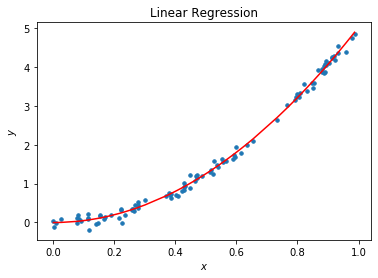

In [174]:
plt.scatter(x, y, s=12)
plt.plot(x, ytilde1, color='r')
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Linear Regression')

plt.show()

In [175]:
print("Mean squared error: %.2f" % mean_squared_error(y, ytilde1))

Mean squared error: 0.01


In [176]:
print('Variance score: %.2f' % r2_score(y, ytilde1))

Variance score: 1.00


In [177]:
print('Mean absolute error: %.2f' % mean_absolute_error(y, ytilde1))

Mean absolute error: 0.07
